In [27]:
!pip install scikit-fuzzy

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando o Antecedente ( Input )

In [29]:
temperatura = ctrl.Antecedent(np.arange(0, 51), "temperatura")
vazao = ctrl.Antecedent(np.arange(0, 101), "vazao")

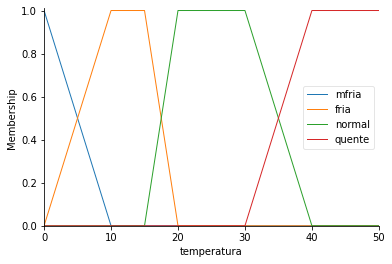

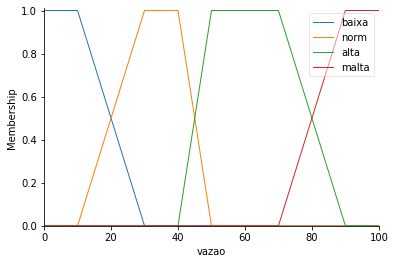

In [31]:
temperatura["mfria"] = fuzz.trimf(temperatura.universe, [0, 0, 10])
temperatura["fria"] = fuzz.trapmf(temperatura.universe, [0, 10, 15, 20])
temperatura["normal"] = fuzz.trapmf(temperatura.universe, [15, 20, 30, 40])
temperatura["quente"] = fuzz.trapmf(temperatura.universe, [30, 40, 50, 50])

vazao["baixa"] = fuzz.trapmf(vazao.universe, [0, 0, 10, 30])
vazao["norm"] = fuzz.trapmf(vazao.universe, [10, 30, 40, 50])
vazao["alta"] = fuzz.trapmf(vazao.universe, [40, 50, 70, 90])
vazao["malta"] = fuzz.trapmf(vazao.universe, [70, 90, 100, 100])

temperatura.view()
vazao.view()

# Criando o Consequente ( Output ) 

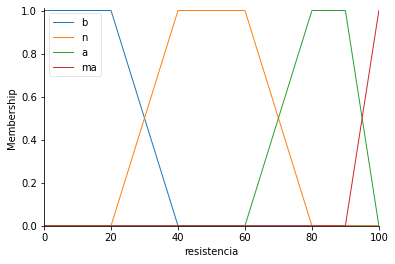

In [32]:
resistencia = ctrl.Consequent(np.arange(0, 101), "resistencia")

resistencia["b"] = fuzz.trapmf(resistencia.universe, [0, 0, 20, 40])
resistencia["n"] = fuzz.trapmf(resistencia.universe, [20, 40, 60, 80])
resistencia["a"] = fuzz.trapmf(resistencia.universe, [60, 80, 90, 100])
resistencia["ma"] = fuzz.trapmf(resistencia.universe, [90, 100, 100, 100])

resistencia.view()

# Criando base de regras

In [33]:
regra1 = ctrl.Rule(temperatura["quente"] | vazao["baixa"], resistencia["b"])
regra2 = ctrl.Rule(temperatura["quente"] | vazao["norm"], resistencia["b"])
regra3 = ctrl.Rule(temperatura["quente"] | vazao["alta"], resistencia["n"])
regra4 = ctrl.Rule(temperatura["quente"] | vazao["malta"], resistencia["n"])
regra5 = ctrl.Rule(temperatura["normal"] | vazao["baixa"], resistencia["n"])
regra6 = ctrl.Rule(temperatura["normal"] | vazao["norm"], resistencia["n"])
regra7 = ctrl.Rule(temperatura["normal"] | vazao["alta"], resistencia["a"])
regra8 = ctrl.Rule(temperatura["normal"] | vazao["malta"], resistencia["a"])
regra9 = ctrl.Rule(temperatura["fria"] | vazao["baixa"], resistencia["a"])
regra10 = ctrl.Rule(temperatura["fria"] | vazao["norm"], resistencia["a"])
regra11 = ctrl.Rule(temperatura["fria"] | vazao["alta"], resistencia["ma"])
regra12 = ctrl.Rule(temperatura["fria"] | vazao["malta"], resistencia["ma"])
regra13 = ctrl.Rule(temperatura["mfria"] | vazao["baixa"], resistencia["a"])
regra14 = ctrl.Rule(temperatura["mfria"] | vazao["norm"], resistencia["ma"])
regra15 = ctrl.Rule(temperatura["mfria"] | vazao["alta"], resistencia["ma"])
regra16 = ctrl.Rule(temperatura["mfria"] | vazao["malta"], resistencia["ma"])

# Criando o Sistema Fuzzy

In [34]:
resposta_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,
                                    regra7,regra8,regra9,regra10,regra11,regra12,
                                    regra13,regra14,regra15,regra16])
resposta = ctrl.ControlSystemSimulation(resposta_ctrl)
resposta2 = ctrl.ControlSystemSimulation(resposta_ctrl)
resposta3 = ctrl.ControlSystemSimulation(resposta_ctrl)

# Testar valores

In [35]:
resposta.input["temperatura"] = 32
resposta.input["vazao"] = 84

resposta.compute()

resposta2.input["temperatura"] = 15
resposta2.input["vazao"] = 20

resposta2.compute()

resposta3.input["temperatura"] = 35
resposta3.input["vazao"] = 80

resposta3.compute()

In [36]:
print(resposta.output["resistencia"])
print(resposta2.output["resistencia"])
print(resposta3.output["resistencia"])

59.10612475303418
55.90277777777778
50.0


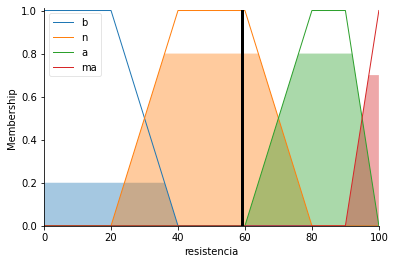

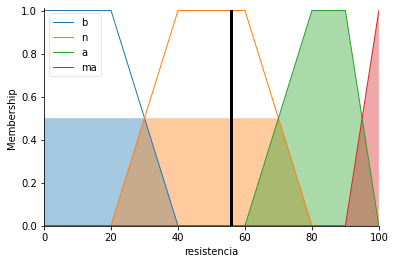

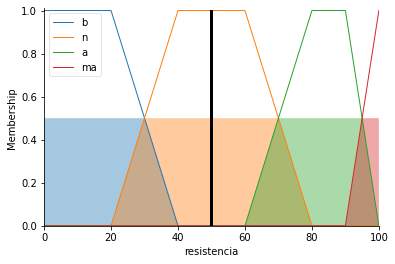

In [37]:
resistencia.view(sim=resposta)
resistencia.view(sim=resposta2)
resistencia.view(sim=resposta3)